In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 

In [3]:
df = pd.read_csv('creditcard.csv')

## Exploratory Data Analysis and Data Preprocessing

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#  Data has no null value
df.isnull().sum()   

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# check data distributions
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


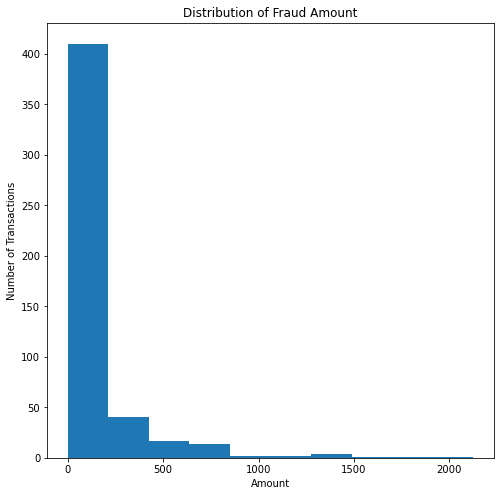

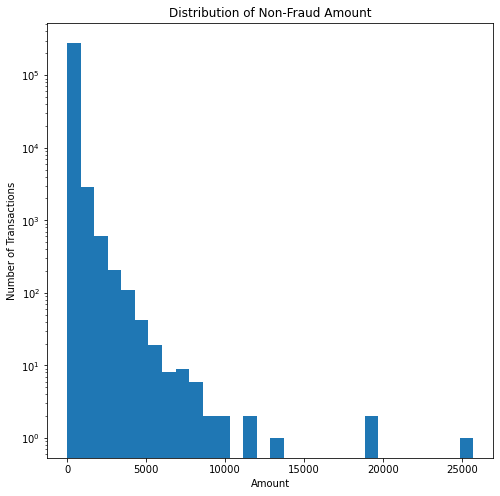

In [7]:
# change 'time' from seconds to hours of the day during period of two days
df['Hour'] =df["Time"].apply(lambda x : divmod(x, 3600)[0]) 

# relationship between Fraud and Amount
plt.figure(figsize=(8,8))
plt.hist(df["Amount"][df["Class"]== 1])
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.title("Distribution of Fraud Amount")
plt.show()

plt.figure(figsize=(8,8))
plt.hist(df["Amount"][df["Class"]== 0], bins = 30)
plt.yscale('log')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.title("Distribution of Non-Fraud Amount")
plt.show()

/Users/samhuang/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/samhuang/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


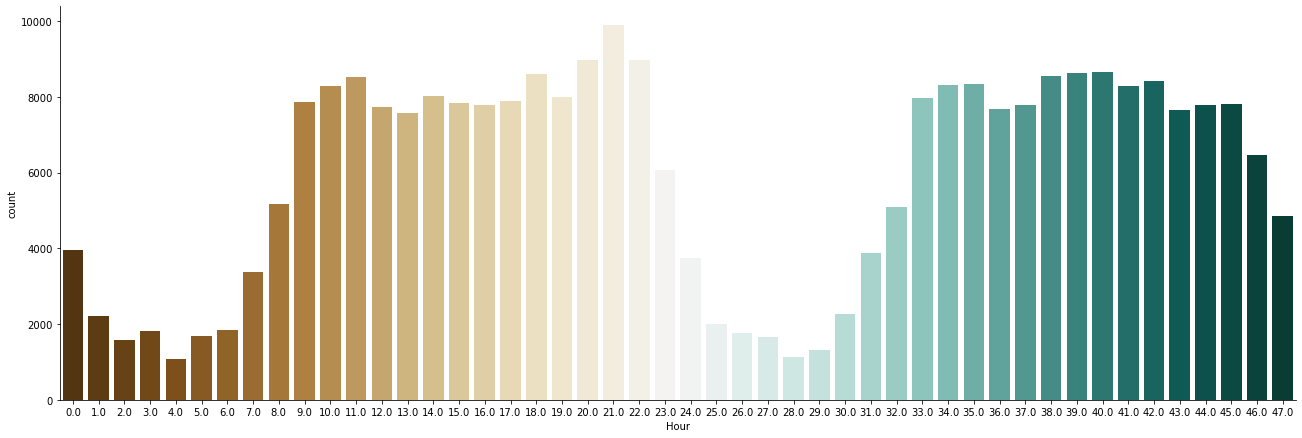

In [8]:
# Credit card was most likely to be used during 9am to 10pm.
sns.factorplot(x="Hour", data=df, kind="count",  palette="BrBG", size=6, aspect=3)

Text(0.5, 1.0, 'Distribution of Fraud and Non-Fraud')

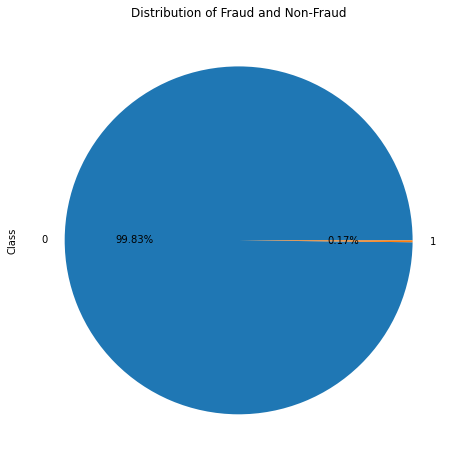

In [9]:
# Data is highly unbalanced, there is only a little sample of Not-Fraud
plt.figure(figsize=(8,8))
df['Class'].value_counts().plot(x=None,y=None, kind='pie',autopct='%1.2f%%')
plt.title("Distribution of Fraud and Non-Fraud")

## Data Preprocessing

In [10]:
# treating unblanced data
X_raw = df.drop(['Class','Amount','Time','Hour'], axis = 1)
Y_raw = df['Class']


sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X_raw, Y_raw)

In [11]:
print(X.shape[0])
y[y==0].shape[0]
y[y==1].shape[0]
print('Total Samples：{}; Fraud Samples{:.2%}; Non-Fraud Samples{:.2%}'.format(X.shape[0], 
                                               y[y==0].shape[0] / X.shape[0],
                                               y[y==1].shape[0] / X.shape[0]))

568630
Total Samples：568630; Fraud Samples50.00%; Non-Fraud Samples50.00%


## Model Training

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [13]:
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
predicted_log = model_log.predict(X_test)

### RandomForest

In [14]:
model_RF = RandomForestClassifier(max_depth = 4)
model_RF.fit(X_train,y_train)
predicted_RF = model_RF.predict(X_test)

### SVM

In [15]:
model_svm = svm.LinearSVC()
model_svm.fit(X_train,y_train)
predicted_SVM = model_svm.predict(X_test)

/Users/samhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### XGBoost

In [16]:
model_xgb = XGBClassifier(max_depth = 4)
model_xgb.fit(X_train,y_train)
predicted_XGB = model_xgb.predict(X_test)

### KNN

In [18]:
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(X_train, y_train)
predicted_knn = model_knn.predict(X_test)

## Evaluation of Different Models

In [19]:
print('F1 score of the Logistic Regression model is {}'
         .format(f1_score(y_test, predicted_log)))
print('F1 score of the RandomForest model is {}'
         .format(f1_score(y_test, predicted_RF)))
print('F1 score of the SVM model is {}'
         .format(f1_score(y_test, predicted_SVM)))
print('F1 score of the XGBoost model is {}'
         .format(f1_score(y_test, predicted_XGB)))
print('F1 score of the KNN model is {}'
         .format(f1_score(y_test, predicted_knn)))



F1 score of the Logistic Regression model is 0.9437048743266964
F1 score of the RandomForest model is 0.9368681250772463
F1 score of the SVM model is 0.9415805058006893
F1 score of the XGBoost model is 0.9987023614683189
F1 score of the KNN model is 0.9989418979194556


In [24]:
print('Recall score of the Logistic Regression model is {}'
         .format(recall_score(y_test, predicted_log)))
print('Recall score of the RandomForest model is {}'
         .format(recall_score(y_test, predicted_RF)))
print('Recall score of the SVM model is {}'
         .format(recall_score(y_test, predicted_SVM)))
print('Recall score of the XGBoost model is {}'
         .format(recall_score(y_test, predicted_XGB)))
print('Recall score of the KNN model is {}'
         .format(recall_score(y_test, predicted_knn)))

Recall score of the Logistic Regression model is 0.9155781835205993
Recall score of the RandomForest model is 0.8871956928838951
Recall score of the SVM model is 0.90812265917603
Recall score of the XGBoost model is 0.999871254681648
Recall score of the KNN model is 1.0


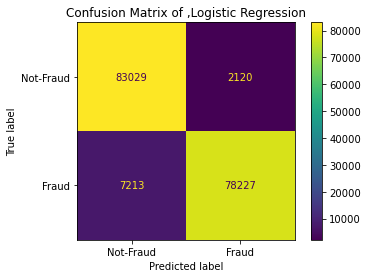

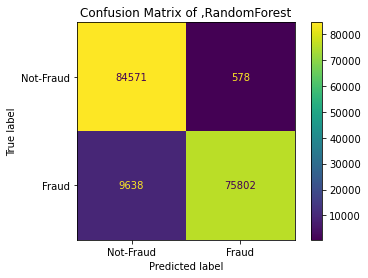

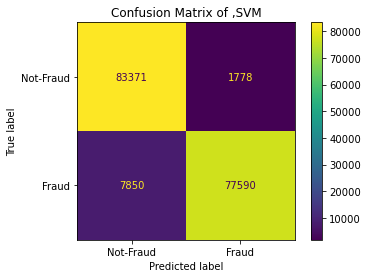

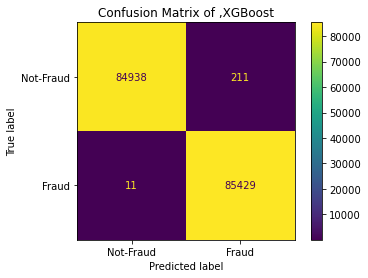

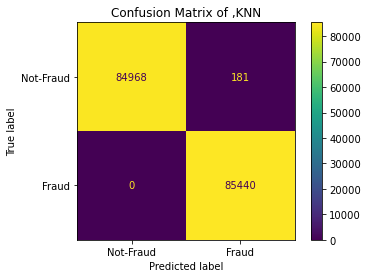

In [23]:
def plot_confusion_matrix(predicted, model_title):
    confusion_matrix = metrics.confusion_matrix(y_test, predicted)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Not-Fraud', 'Fraud'])
    
    cm_display.plot()
    plt.title('Confusion Matrix of ,' + model_title)
    plt.show()


plot_confusion_matrix(predicted_log, 'Logistic Regression')
plot_confusion_matrix(predicted_RF, 'RandomForest')
plot_confusion_matrix(predicted_SVM, 'SVM')
plot_confusion_matrix(predicted_XGB, 'XGBoost')
plot_confusion_matrix(predicted_knn, 'KNN')